In [90]:
import pandas as pd
from pprint import pprint as pp
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import math as m
from datetime import datetime, timedelta
import numpy as np

In [91]:
raw_data_0 = pd.read_csv("data/California_Fire_Incidents.csv")
raw_data_0.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [92]:
# Output names of all columns
for name in raw_data_0.columns:
    print(name);
raw_data_0.columns

AcresBurned
Active
AdminUnit
AirTankers
ArchiveYear
CalFireIncident
CanonicalUrl
ConditionStatement
ControlStatement
Counties
CountyIds
CrewsInvolved
Dozers
Engines
Extinguished
Fatalities
Featured
Final
FuelType
Helicopters
Injuries
Latitude
Location
Longitude
MajorIncident
Name
PercentContained
PersonnelInvolved
Public
SearchDescription
SearchKeywords
Started
Status
StructuresDamaged
StructuresDestroyed
StructuresEvacuated
StructuresThreatened
UniqueId
Updated
WaterTenders


Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders'],
      dtype='object')

In [93]:
# Take out unneccessary columns
raw_data = raw_data_0[['AcresBurned', 'AdminUnit', 'ArchiveYear',
       'Counties', 'Extinguished', 'Fatalities', 'Latitude', 'Location',
       'Longitude', 'Name', 'SearchDescription', 'Started', 
       'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated', 'StructuresThreatened']].rename(columns=({'Counties':'County', 'Location':'FireLocation','Name':'FireName'}))

In [94]:
# Review all column stats
raw_data.describe(include="all")

,AcresBurned,AdminUnit,ArchiveYear,County,Extinguished,Fatalities,Latitude,FireLocation,Longitude,FireName,SearchDescription,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
count,1633.000000,1636,1636.000000,1636,1577,21.000000,1636.000000,1636,1636.000000,1636,1619,1636,67.000000,175.000000,0.0,30.000000
unique,NaN,494,NaN,59,1038,NaN,NaN,1606,NaN,1193,1591,1597,NaN,NaN,NaN,NaN
top,NaN,CAL FIRE Sonoma-Lake-Napa Unit,NaN,Riverside,2019-01-04T09:33:00Z,NaN,NaN,"throughout Sonoma, Solano, Lake & Colusa Counties",NaN,Creek Fire,"The Ranch Fire started July 27, 2018 off Highw...",2013-06-10T00:46:00Z,NaN,NaN,NaN,NaN
freq,NaN,89,NaN,146,7,NaN,NaN,4,NaN,15,4,4,NaN,NaN,NaN,NaN
mean,4589.443968,NaN,2016.608802,NaN,NaN,8.619048,37.203975,NaN,-108.082642,NaN,NaN,NaN,67.970149,271.788571,NaN,522.800000
std,27266.337722,NaN,1.845340,NaN,NaN,18.529642,135.401380,NaN,37.006927,NaN,NaN,NaN,155.771975,1557.255963,NaN,739.586856
min,0.000000,NaN,2013.000000,NaN,NaN,1.000000,-120.258000,NaN,-124.196290,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,35.000000,NaN,2015.000000,NaN,NaN,1.000000,34.165890,NaN,-121.768358,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000
50%,100.000000,NaN,2017.000000,NaN,NaN,3.000000,37.104065,NaN,-120.461560,NaN,NaN,NaN,6.000000,7.000000,NaN,45.000000
75%,422.000000,NaN,2018.000000,NaN,NaN,6.000000,39.086808,NaN,-117.474072,NaN,NaN,NaN,49.500000,41.500000,NaN,1043.750000


In [96]:
# Review only Longitude and Latitude data
raw_data[["Latitude", "Longitude", "FireLocation"]].describe(include="all")

,Latitude,Longitude,FireLocation
count,1636.000000,1636.000000,1636
unique,NaN,NaN,1606
top,NaN,NaN,"throughout Sonoma, Solano, Lake & Colusa Counties"
freq,NaN,NaN,4
mean,37.203975,-108.082642,NaN
std,135.401380,37.006927,NaN
min,-120.258000,-124.196290,NaN
25%,34.165890,-121.768358,NaN
50%,37.104065,-120.461560,NaN
75%,39.086808,-117.474072,NaN


In [97]:
# Required data cleaning for lattitude
# Longitude should be within [-180:180] - raw data range is [-124.196:118.908]
# Latitude should be within [-90:90] - raw data range is [-120.258:5487.0000]
raw_data.shape # (1636, 40)



clean_data_1 = raw_data[((raw_data['Latitude'] > -90) & (raw_data['Latitude'] < 90))]
clean_data_1[["Latitude", "Longitude", "FireLocation"]].describe(include="all")

,Latitude,Longitude,FireLocation
count,1630.000000,1630.000000,1630
unique,NaN,NaN,1600
top,NaN,NaN,"throughout Sonoma, Solano, Lake & Colusa Counties"
freq,NaN,NaN,4
mean,33.755710,-108.421282,NaN
std,11.188045,36.375269,NaN
min,0.000000,-124.196290,NaN
25%,34.165724,-121.772535,NaN
50%,37.099285,-120.473610,NaN
75%,39.067338,-117.481567,NaN


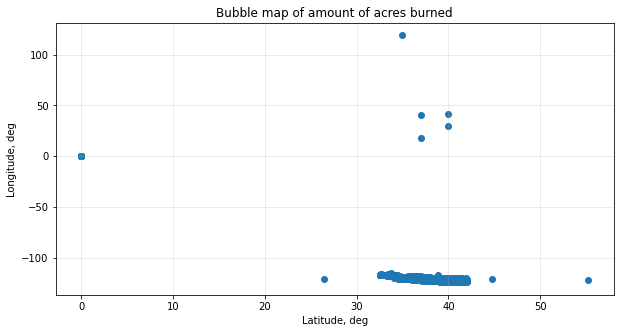

In [98]:
plt.figure(figsize=(10,5))
plt.scatter(clean_data_1.Latitude, clean_data_1.Longitude)
# plt.colorbar()
plt.ylabel("Longitude, deg")
plt.xlabel("Latitude, deg")
plt.title("Bubble map of amount of acres burned")
plt.grid(alpha=0.3)

In [99]:
# Further, if we refer to known lat/lon ranges for california, we need to remove some of the existing
# non-California outliers
# from https://www.netstate.com/states/geography/ca_geography.html we have 
#      Longitude: 114° 8' W to 124° 24' W
#      Latitude: 32° 30' N to 42° N
clean_data_2 = clean_data_1[((clean_data_1['Latitude'] > 32) & (clean_data_1['Latitude'] < 42))]
clean_data_3 = clean_data_2[((clean_data_2['Longitude'] < -114) & (clean_data_2['Latitude'] > -124))]
print("Number of records after Latitude sorting\t" + str(clean_data_2.shape))
print("Number of records after Longitude sorting\t" + str(clean_data_3.shape))


Number of records after Latitude sorting	(1470, 16)
Number of records after Longitude sorting	(1465, 16)


No handles with labels found to put in legend.


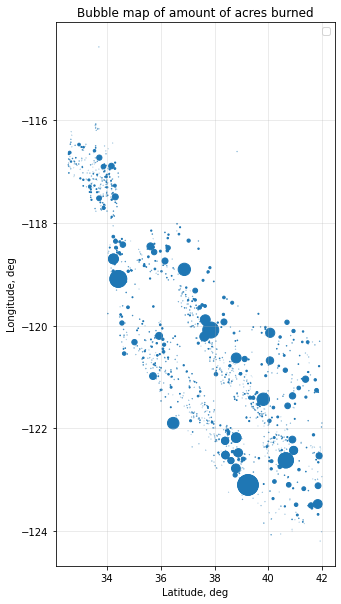

In [100]:
x = clean_data_3.Latitude
y = clean_data_3.Longitude

plt.figure(figsize=(5,10))
plt.scatter(x, 
            clean_data_3.Longitude, 
            s = clean_data_3.AcresBurned/1000, 
            c = 'tab:blue')
# plt.colorbar()
plt.ylabel("Longitude, deg")
plt.xlabel("Latitude, deg")
plt.title("Bubble map of amount of acres burned")
plt.legend()
plt.grid(alpha=0.3)

# for i, txt in enumerate(clean_data_3.Counties):
#     plt.annotate(txt, (clean_data_3.Latitude[i], clean_data_3.Longitude[i]))

In [102]:
clean_data_3.sort_values('AcresBurned', ascending=False)[['FireName','County','Started','Extinguished','AcresBurned']].head(10)

,FireName,County,Started,Extinguished,AcresBurned
1055,Ranch Fire (Mendocino Complex),Glenn,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,410203.0
1056,Ranch Fire (Mendocino Complex),Lake,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,410203.0
1057,Ranch Fire (Mendocino Complex),Mendocino,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,410203.0
1054,Ranch Fire (Mendocino Complex),Colusa,2018-07-27T12:05:00Z,2019-01-04T09:33:00Z,410203.0
616,Thomas Fire,Santa Barbara,2017-12-04T18:28:00Z,2019-03-14T11:24:00Z,281893.0
617,Thomas Fire,Ventura,2017-12-04T18:28:00Z,2019-03-14T11:24:00Z,281893.0
0,Rim Fire,Tuolumne,2013-08-17T15:25:00Z,2013-09-06T18:30:00Z,257314.0
1059,Carr Fire,Trinity,2018-07-23T13:15:00Z,2019-01-04T09:37:00Z,229651.0
1058,Carr Fire,Shasta,2018-07-23T13:15:00Z,2019-01-04T09:37:00Z,229651.0
1060,Camp Fire,Butte,2018-11-08T06:33:00Z,2018-11-25T08:00:00Z,153336.0


In [104]:
# for i, row in clean_data_3.iterrows():
#     row['TimeStarted'][i] = datetime.strptime(row['Started'][i],"%Y-%m-%d %H:%M:%S")
clean_data_3['TimeStarted'] = pd.to_datetime(clean_data_3['Started'])
clean_data_3['TimeExtinguished'] = pd.to_datetime(clean_data_3['Extinguished'])
clean_data_3.sort_values('AcresBurned', ascending=False)[['FireName','County','Started','TimeStarted','Extinguished','TimeExtinguished','AcresBurned']].head(10)

<ipython-input-104-85f217a637cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_3['TimeStarted'] = pd.to_datetime(clean_data_3['Started'])
<ipython-input-104-85f217a637cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_3['TimeExtinguished'] = pd.to_datetime(clean_data_3['Extinguished'])


,FireName,County,Started,TimeStarted,Extinguished,TimeExtinguished,AcresBurned
1055,Ranch Fire (Mendocino Complex),Glenn,2018-07-27T12:05:00Z,2018-07-27 12:05:00+00:00,2019-01-04T09:33:00Z,2019-01-04 09:33:00+00:00,410203.0
1056,Ranch Fire (Mendocino Complex),Lake,2018-07-27T12:05:00Z,2018-07-27 12:05:00+00:00,2019-01-04T09:33:00Z,2019-01-04 09:33:00+00:00,410203.0
1057,Ranch Fire (Mendocino Complex),Mendocino,2018-07-27T12:05:00Z,2018-07-27 12:05:00+00:00,2019-01-04T09:33:00Z,2019-01-04 09:33:00+00:00,410203.0
1054,Ranch Fire (Mendocino Complex),Colusa,2018-07-27T12:05:00Z,2018-07-27 12:05:00+00:00,2019-01-04T09:33:00Z,2019-01-04 09:33:00+00:00,410203.0
616,Thomas Fire,Santa Barbara,2017-12-04T18:28:00Z,2017-12-04 18:28:00+00:00,2019-03-14T11:24:00Z,2019-03-14 11:24:00+00:00,281893.0
617,Thomas Fire,Ventura,2017-12-04T18:28:00Z,2017-12-04 18:28:00+00:00,2019-03-14T11:24:00Z,2019-03-14 11:24:00+00:00,281893.0
0,Rim Fire,Tuolumne,2013-08-17T15:25:00Z,2013-08-17 15:25:00+00:00,2013-09-06T18:30:00Z,2013-09-06 18:30:00+00:00,257314.0
1059,Carr Fire,Trinity,2018-07-23T13:15:00Z,2018-07-23 13:15:00+00:00,2019-01-04T09:37:00Z,2019-01-04 09:37:00+00:00,229651.0
1058,Carr Fire,Shasta,2018-07-23T13:15:00Z,2018-07-23 13:15:00+00:00,2019-01-04T09:37:00Z,2019-01-04 09:37:00+00:00,229651.0
1060,Camp Fire,Butte,2018-11-08T06:33:00Z,2018-11-08 06:33:00+00:00,2018-11-25T08:00:00Z,2018-11-25 08:00:00+00:00,153336.0


In [157]:
# # Find out which day of the week fires started
clean_data_3['DayOfWeekStartedName'] = clean_data_3.apply(lambda row: row.TimeStarted.strftime("%a"), axis = 1)
clean_data_3['DayOfWeekStartedNum'] = clean_data_3.apply(lambda row: int(row.TimeStarted.strftime("%w")), axis = 1)
                                                                                
clean_data_3['Duration'] = clean_data_3.apply(
    lambda row: (row.TimeExtinguished - row.TimeStarted),
    axis = 1)

clean_data_3['Duration'] = clean_data_3['Duration'].dt.total_seconds()/3600/24



<ipython-input-157-b3be8a84f861>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_3['DayOfWeekStartedName'] = clean_data_3.apply(lambda row: row.TimeStarted.strftime("%a"), axis = 1)
<ipython-input-157-b3be8a84f861>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_3['DayOfWeekStartedNum'] = clean_data_3.apply(lambda row: int(row.TimeStarted.strftime("%w")), axis = 1)
<ipython-input-157-b3be8a84f861>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [158]:
clean_data_3.sort_values('AcresBurned', ascending=False)[['FireName','County','TimeStarted', 'DayOfWeekStartedName', 'TimeExtinguished', 'Duration','AcresBurned']]

,FireName,County,TimeStarted,DayOfWeekStartedName,TimeExtinguished,Duration,AcresBurned
1055,Ranch Fire (Mendocino Complex),Glenn,2018-07-27 12:05:00+00:00,Fri,2019-01-04 09:33:00+00:00,160.894444,410203.0
1056,Ranch Fire (Mendocino Complex),Lake,2018-07-27 12:05:00+00:00,Fri,2019-01-04 09:33:00+00:00,160.894444,410203.0
1057,Ranch Fire (Mendocino Complex),Mendocino,2018-07-27 12:05:00+00:00,Fri,2019-01-04 09:33:00+00:00,160.894444,410203.0
1054,Ranch Fire (Mendocino Complex),Colusa,2018-07-27 12:05:00+00:00,Fri,2019-01-04 09:33:00+00:00,160.894444,410203.0
616,Thomas Fire,Santa Barbara,2017-12-04 18:28:00+00:00,Mon,2019-03-14 11:24:00+00:00,464.705556,281893.0
...,...,...,...,...,...,...,...
278,Happy Camp Complex,Siskiyou,2014-08-11 22:00:00+00:00,Mon,2014-08-14 09:30:00+00:00,2.479167,0.0
1053,Oroville Spillway,Butte,2017-02-07 14:00:00+00:00,Tue,2018-01-09 09:24:00+00:00,335.808333,0.0
1633,Cashe Fire,Yolo,2019-11-25 12:02:02+00:00,Mon,NaT,NaN,NaN
1634,Oak Fire,San Diego,2019-10-22 19:20:44+00:00,Tue,NaT,NaN,NaN


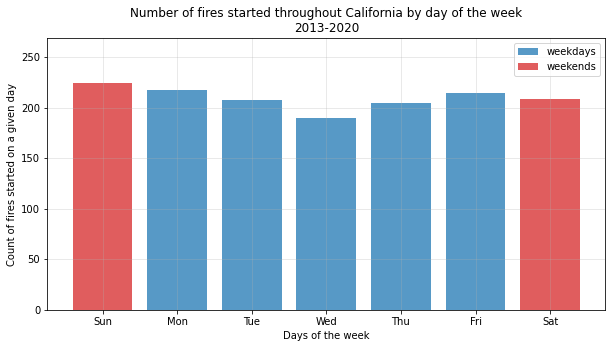

In [108]:
# Extract count of fires starting on a given day of the week
freq, val = np.histogram(clean_data_3.DayOfWeekStartedNum, bins=7)

# Plot a bar chart, highlighting weekend and work week days 
plt.figure(figsize=(10,5))
daysOfTheWeek=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
daysOfTheWeekColors = ["tab:red", "tab:blue", "tab:blue", "tab:blue", "tab:blue", "tab:blue", "tab:red"]
plt.bar(daysOfTheWeek, freq, color = daysOfTheWeekColors, alpha=0.75)

legend_elements = [Patch(facecolor='tab:blue', alpha=0.75, label='weekdays'),
                  Patch(facecolor='tab:red', alpha=0.75, label='weekends')]

# Create the figure
plt.legend(handles=legend_elements, loc='center')
plt.ylim([0, freq.max()*1.2])
plt.xlabel("Days of the week")
plt.ylabel("Count of fires started on a given day")
plt.title("Number of fires started throughout California by day of the week\n2013-2020")

plt.legend(handles=legend_elements)
plt.grid(alpha=0.35)

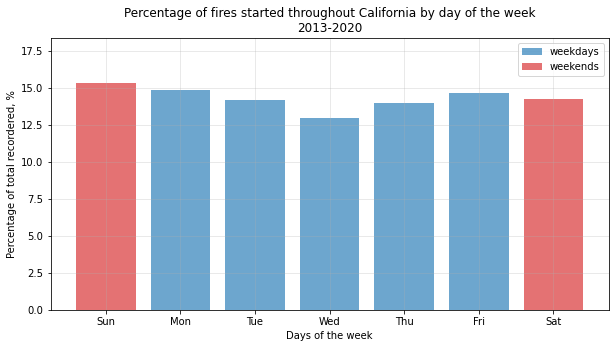

In [109]:
# Plot normalized bar chart, highlighting weekend and work week days 
plt.figure(figsize=(10,5))
daysOfTheWeek=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
daysOfTheWeekColors = ["tab:red", "tab:blue", "tab:blue", "tab:blue", "tab:blue", "tab:blue", "tab:red"]
plt.bar(daysOfTheWeek, 100*freq/freq.sum(), color = daysOfTheWeekColors, alpha=0.65)

legend_elements = [Patch(facecolor='tab:blue', alpha=0.65, label='weekdays'),
                  Patch(facecolor='tab:red', alpha=0.65, label='weekends')]

# Create the figure
plt.legend(handles=legend_elements, loc='center')
plt.ylim([0, (100*freq/freq.sum()).max()*1.2])
plt.xlabel("Days of the week")
plt.ylabel("Percentage of total recordered, %")
plt.title("Percentage of fires started throughout California by day of the week\n2013-2020")

plt.legend(handles=legend_elements)
plt.grid(alpha=0.35)

### Source California County information from Wikipedia 
This is done to access listing of all teh counties, as well as their Population and Area data

In [110]:
# Read in list of California counties from Wikipedia
raw_california_counties = pd.read_html("https://en.wikipedia.org/wiki/List_of_counties_in_California")
len(raw_california_counties)

4

In [111]:
# Separating 2nd rendered table object on the page
raw_california_counties[1]
# List all available columns
raw_california_counties[1].columns

Index(['County', 'FIPS code[5]', 'County seat[6]', 'Est.[6]', 'Formed from',
       'Etymology[7]', 'General Law or Charter[8]',
       'Population (July 2019)[9]', 'Area[6]', 'Map'],
      dtype='object')

In [112]:
# Clean California counties data
clean_california_counties_1 = raw_california_counties[1]
clean_california_counties_1.head()

,County,FIPS code[5],County seat[6],Est.[6],Formed from,Etymology[7],General Law or Charter[8],Population (July 2019)[9],Area[6],Map
0,Alameda County,1,Oakland,1853,Contra Costa and Santa Clara,"The oak and other trees, once abundant in the ...",Charter,1671329,"738 sq mi(1,911 km2)",NaN
1,Alpine County,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada; alpine ref...,General Law,1129,"739 sq mi(1,914 km2)",NaN
2,Amador County,5,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",General Law,39752,"606 sq mi(1,570 km2)",NaN
3,Butte County,7,Oroville,1850,original,"Sutter Buttes, which were mistakenly thought t...",Charter,219186,"1,640 sq mi(4,248 km2)",NaN
4,Calaveras County,9,San Andreas,1850,original,"Calaveras River; calaveras is Spanish for ""sku...",General Law,45905,"1,020 sq mi(2,642 km2)",NaN


In [113]:
clean_california_counties_1.columns=['County', 'FIPS', 'Seat', 'Date_Established', 'FormedFrom',
       'Etymology', 'Law','Population_Jul_2019', 'Area', 'Map']
clean_california_counties_1.head()

,County,FIPS,Seat,Date_Established,FormedFrom,Etymology,Law,Population_Jul_2019,Area,Map
0,Alameda County,1,Oakland,1853,Contra Costa and Santa Clara,"The oak and other trees, once abundant in the ...",Charter,1671329,"738 sq mi(1,911 km2)",NaN
1,Alpine County,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada; alpine ref...,General Law,1129,"739 sq mi(1,914 km2)",NaN
2,Amador County,5,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",General Law,39752,"606 sq mi(1,570 km2)",NaN
3,Butte County,7,Oroville,1850,original,"Sutter Buttes, which were mistakenly thought t...",Charter,219186,"1,640 sq mi(4,248 km2)",NaN
4,Calaveras County,9,San Andreas,1850,original,"Calaveras River; calaveras is Spanish for ""sku...",General Law,45905,"1,020 sq mi(2,642 km2)",NaN


In [114]:
clean_california_counties_2 = clean_california_counties_1[['County', 'Date_Established','Population_Jul_2019', 'Area']]
clean_california_counties_2.head()

,County,Date_Established,Population_Jul_2019,Area
0,Alameda County,1853,1671329,"738 sq mi(1,911 km2)"
1,Alpine County,1864,1129,"739 sq mi(1,914 km2)"
2,Amador County,1854,39752,"606 sq mi(1,570 km2)"
3,Butte County,1850,219186,"1,640 sq mi(4,248 km2)"
4,Calaveras County,1850,45905,"1,020 sq mi(2,642 km2)"


In [115]:
# Remove string "County" from the column "County"
clean_california_counties_2.County = clean_california_counties_2.County.str.replace(" County", "")
clean_california_counties_2.head()

C:\Users\troub\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,County,Date_Established,Population_Jul_2019,Area
0,Alameda,1853,1671329,"738 sq mi(1,911 km2)"
1,Alpine,1864,1129,"739 sq mi(1,914 km2)"
2,Amador,1854,39752,"606 sq mi(1,570 km2)"
3,Butte,1850,219186,"1,640 sq mi(4,248 km2)"
4,Calaveras,1850,45905,"1,020 sq mi(2,642 km2)"


In [116]:
# split area column into two for diferent units
clean_california_counties_2[["AreaSqMi", "AreaKm2"]] = clean_california_counties_2.Area.str.split("(",expand=True)
print(clean_california_counties_2.columns)
#       Drop old Area column
clean_california_counties_2 = clean_california_counties_2.drop(["Area"], axis=1)
clean_california_counties_2.head()

Index(['County', 'Date_Established', 'Population_Jul_2019', 'Area', 'AreaSqMi',
       'AreaKm2'],
      dtype='object')


C:\Users\troub\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
0,Alameda,1853,1671329,738 sq mi,"1,911 km2)"
1,Alpine,1864,1129,739 sq mi,"1,914 km2)"
2,Amador,1854,39752,606 sq mi,"1,570 km2)"
3,Butte,1850,219186,"1,640 sq mi","4,248 km2)"
4,Calaveras,1850,45905,"1,020 sq mi","2,642 km2)"


In [117]:
# Find which special characters are used for spaces in column header 
clean_california_counties_2.iloc[0,3]
clean_california_counties_2.iloc[0,4]

'1,911\xa0km2)'

In [118]:
# Remove unit references from data including using special '\xa0' combination for blank spaces
clean_california_counties_2.AreaSqMi = (clean_california_counties_2.AreaSqMi.str.replace("\xa0sq\xa0mi","",regex=False).str.replace(",","",regex=False)).astype('int64')
clean_california_counties_2.AreaKm2  = (clean_california_counties_2.AreaKm2.str.replace("\xa0km2)","", regex=False).str.replace(",","",regex=False)).astype('int64')
clean_california_counties_2.head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
0,Alameda,1853,1671329,738,1911
1,Alpine,1864,1129,739,1914
2,Amador,1854,39752,606,1570
3,Butte,1850,219186,1640,4248
4,Calaveras,1850,45905,1020,2642


In [119]:
clean_california_counties_2.describe(include='all')

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
count,58,58.000000,5.800000e+01,58.000000,58.000000
unique,58,NaN,NaN,NaN,NaN
top,Plumas,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,1858.224138,6.812452e+05,2692.189655,6972.724138
std,NaN,13.972458,1.467932e+06,3102.397089,8035.121416
min,NaN,1850.000000,1.129000e+03,47.000000,122.000000
25%,NaN,1850.000000,4.804825e+04,960.000000,2486.250000
50%,NaN,1851.500000,1.870290e+05,1535.500000,3977.000000
75%,NaN,1860.000000,7.092760e+05,3462.250000,8967.000000


In [120]:
# Sort DF by population in descending order to view to 5 most populated counties
clean_california_counties_2.sort_values(['Population_Jul_2019'], ascending=False).head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
18,Los Angeles,1850,10039107,4060,10515
36,San Diego,1850,3338330,4204,10888
29,Orange,1889,3175692,948,2455
32,Riverside,1893,2470546,7208,18669
35,San Bernardino,1853,2180085,20062,51960


In [121]:
# Calculate population density per square mile 
clean_california_counties_2['PopDensityPerSqMi'] = clean_california_counties_2['Population_Jul_2019']
clean_california_counties_2['PopDensityPerSqMi'] = clean_california_counties_2.Population_Jul_2019/clean_california_counties_2.AreaSqMi

# Sort DF by population density in descending order to view to 5 most densly populated counties
clean_california_counties_2.sort_values(['PopDensityPerSqMi'], ascending=False).head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2,PopDensityPerSqMi
37,San Francisco,1850,881549,47,122,18756.361702
29,Orange,1889,3175692,948,2455,3349.886076
18,Los Angeles,1850,10039107,4060,10515,2472.686453
0,Alameda,1853,1671329,738,1911,2264.673442
40,San Mateo,1856,766573,449,1163,1707.289532


[<matplotlib.lines.Line2D object at 0x000001633C8ADDF0>, <matplotlib.lines.Line2D object at 0x000001633C8ADEB0>, <matplotlib.lines.Line2D object at 0x000001633C8ADF70>] ['$\\mathdefault{500}$', '$\\mathdefault{1000}$', '$\\mathdefault{1500}$']


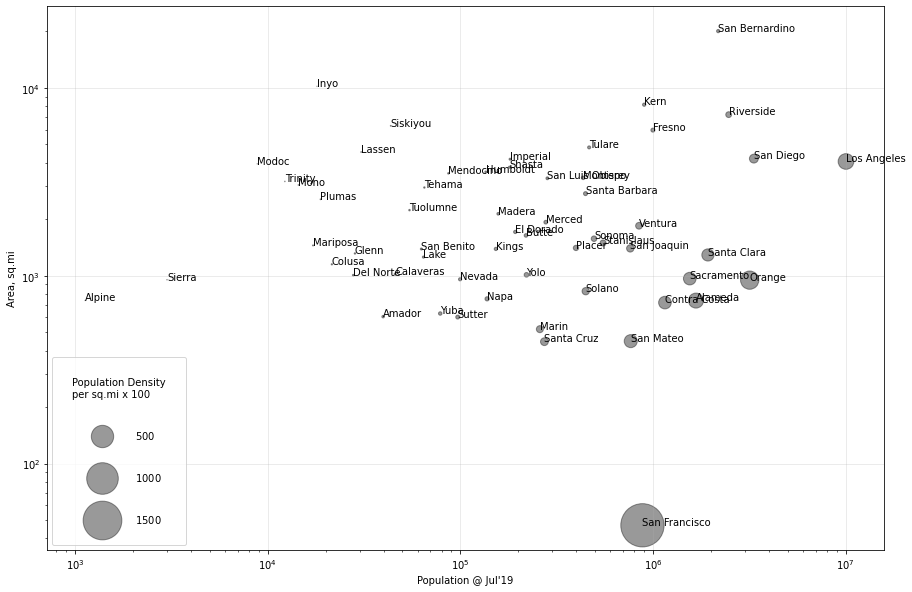

In [122]:
x = clean_california_counties_2.Population_Jul_2019
y = clean_california_counties_2.AreaSqMi
z = clean_california_counties_2.County
size = clean_california_counties_2.PopDensityPerSqMi/10

plt.figure(figsize=(15,10))
scatter = plt.scatter(x, y, s=size, alpha=0.4, c = "black")
# produce a legend with a cross section of sizes from the scatter

plt.xlabel("Population @ Jul'19")
plt.ylabel("Area, sq.mi")
plt.grid(alpha=0.3)
plt.xscale("log")
plt.yscale("log")
    
handles, labels = scatter.legend_elements("sizes", num=4)
legend = plt.legend(handles, labels, 
           loc = "lower left", 
           title = "Population Density\nper sq.mi x 100", 
           labelspacing = 3,
           handlelength=5,
           borderpad = 2)

print(handles, labels)

for handle in legend.legendHandles:
    handle.set_color('blue')
    
for i, txt in enumerate(z):
    plt.annotate(txt, (x[i], y[i]))


### Source California County types from [www.counties.org/data-and-research](https://www.counties.org/sites/main/files/file-attachments/datapile_-_headline_datasets_-_current.xlsx) 
This is done to access types of  oall of the counties

In [123]:
# data from https://www.counties.org/data-and-research, 
# https://www.counties.org/sites/main/files/file-attachments/datapile_-_headline_datasets_-_current.xlsx

raw_california_coucus = pd.read_excel("./data/datapile_-_headline_datasets_-_current.xlsx", sheet_name="County & Government")
clean_california_caucus = raw_california_coucus[['County','Caucus']]
clean_california_caucus.head()

,County,Caucus
0,Alameda,Urban
1,Alpine,Rural
2,Amador,Rural
3,Butte,Suburban
4,Calaveras,Rural


In [124]:
# Merge counties data with caucus
clean_california_counties_merged = pd.merge(clean_california_counties_2, clean_california_caucus, on='County')
clean_california_counties_merged.head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2,PopDensityPerSqMi,Caucus
0,Alameda,1853,1671329,738,1911,2264.673442,Urban
1,Alpine,1864,1129,739,1914,1.527740,Rural
2,Amador,1854,39752,606,1570,65.597360,Rural
3,Butte,1850,219186,1640,4248,133.650000,Suburban
4,Calaveras,1850,45905,1020,2642,45.004902,Rural


In [125]:
clean_california_counties_merged.Caucus.unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

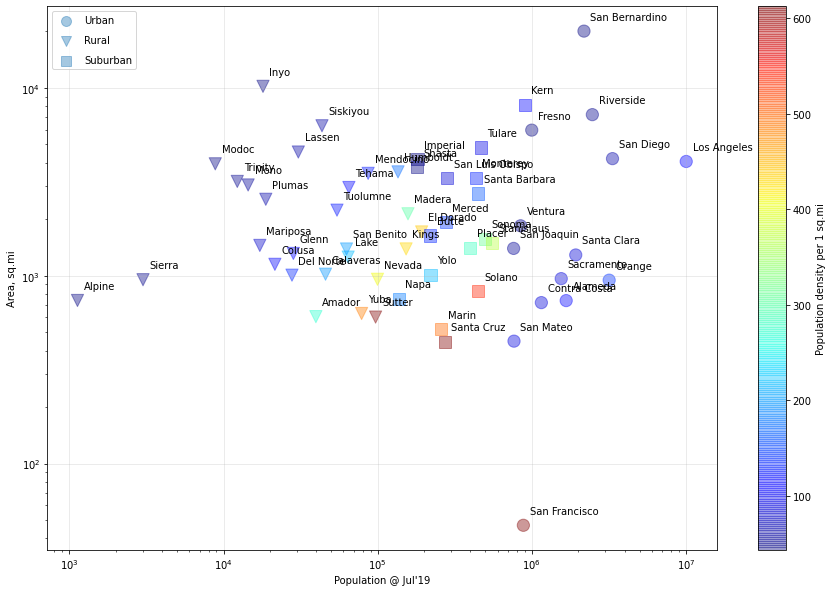

In [126]:
# Prep data for plotting input
x = clean_california_counties_2.Population_Jul_2019
y = clean_california_counties_2.AreaSqMi
counties = clean_california_counties_2.County

# Define variety of markers to be used 
shape = ["o", "v", "s"]

# Setup figure
plt.figure(figsize=(15,10))

i=0
# Run through each county type
for item in clean_california_counties_merged.Caucus.unique():
    # Extract data for specific county type     
    data = clean_california_counties_merged[clean_california_counties_merged['Caucus'] == item]
    
    # redefine subsets for coordinates     
    x_sub = data.Population_Jul_2019
    y_sub = data.AreaSqMi
    counties_sub = data.County
    
    plt.scatter(x_sub, y_sub, 
        s = 150,
        c = data.PopDensityPerSqMi,
        cmap = 'jet',
        marker = shape[i],
        alpha = 0.4, 
        label = item 
        )
    i+=1
# Set up, label and view colorbar
cbar = plt.colorbar()
cbar.set_label('Population density per 1 sq.mi')

#  Set up X, Y axes labels    
plt.xlabel("Population @ Jul'19")
plt.ylabel("Area, sq.mi")

#  Set up legend
legend = plt.legend(loc="upper left", fontsize=10, labelspacing=1)

# change the marker size manually to amke the same
for handle in legend.legendHandles:
    handle.set_sizes([100.0])

# view grid and set transparency to 30%
plt.grid(alpha=0.3)

# Change both x and y scales to logarithmic
plt.xscale("log")
plt.yscale("log")



for i, txt in enumerate(counties):
    plt.annotate(txt, (x[i]*1.1, y[i]*1.15), fontsize = 10)

In [127]:
# 
raw_land_use = pd.read_excel("./data/datapile_-_headline_datasets_-_current.xlsx", sheet_name="County Profile")
raw_land_use.head()

,County,Gross Domestic Product (2018),GDP Change from Previous Year,Residential Building Permits: Single-Unit - Number (2018),Residential Building Permits: Single Unit - Value (2018),Residential Building Permits: Multi-Unit - # of Units (2018),Residential Building Permits: Multi-Unit - Value (2018),Housing Units: Single Family (January 2019),Housing Units: Multi-Family (January 2019),Housing Units: Mobile Homes (January 2019),...,Registered Trailers (2018),Registered Motorcycles (2018),Violent Crimes (2018),Property Crimes (2018),Farms (August 2018),Ag: Planted Acres (August 2018),Ag: Volunteer Acres (August 2018),Ag: Failed Acres (August 2018),Ag: Prevented Acres (August 2018),Ag: Not Planted Acres (August 2018)
0,Alameda,144494091000,0.039,1965,682283505,6091,1352542307,365797,232321,7859,...,53443,32840,9948,58856,271,165009.15,107.46,0.0,0.00,0.00
1,Alpine,230220000,0.090,4,1256629,0,0,1073,676,34,...,433,71,12,29,10,77811.63,0.00,0.0,0.00,0.00
2,Amador,1864239000,0.039,172,40249994,0,0,15545,1310,1423,...,10862,2169,118,596,238,192891.71,3.22,0.0,0.00,0.00
3,Butte,10332996000,0.024,595,128664970,108,12499351,55404,19294,10749,...,44843,7095,1214,5824,568,199970.87,4641.91,0.0,138.47,219.64
4,Calaveras,1642450000,-0.008,112,29518251,0,0,24871,1068,2271,...,15739,3031,197,860,222,240243.30,7085.02,0.0,0.00,0.00


In [128]:
for i in clean_data_3.County.unique():
    print(i)

Tuolumne
Los Angeles
Riverside
Placer
Fresno
Siskiyou
Humboldt
Tehama
Shasta
San Diego
Kern
Ventura
Sonoma
Contra Costa
Butte
Tulare
Santa Barbara
Mariposa
El Dorado
San Bernardino
Plumas
Modoc
San Luis Obispo
Madera
Inyo
Napa
San Benito
San Joaquin
Alameda
Glenn
Yolo
Sacramento
Stanislaus
Solano
Merced
Lake
Monterey
Mendocino
Lassen
Amador
Yuba
Nevada
Santa Clara
Calaveras
San Mateo
Orange
Colusa
Trinity
Alpine
Mono
Sutter
Del Norte
Kings
Sierra
Santa Cruz
Marin
Mexico
State of Nevada


### Merging fire data with county stats & types


In [161]:
final_data = pd.merge(clean_data_3, clean_california_counties_merged, on='County', how='inner')
final_data.head()

,AcresBurned,AdminUnit,ArchiveYear,County,Extinguished,Fatalities,Latitude,FireLocation,Longitude,FireName,...,TimeExtinguished,DayOfWeekStartedName,DayOfWeekStartedNum,Duration,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2,PopDensityPerSqMi,Caucus
0,257314.0,Stanislaus National Forest/Yosemite National Park,2013,Tuolumne,2013-09-06T18:30:00Z,NaN,37.85700,3 miles east of Groveland along Hwy 120,-120.08600,Rim Fire,...,2013-09-06 18:30:00+00:00,Sat,6,20.128472,1850,54478,2236,5791,24.364043,Rural
1,1070.0,Stanislaus National Forest,2013,Tuolumne,2013-08-14T08:30:00Z,NaN,38.25108,"Near Beardsley Lake, northeast of Sonora",-120.02778,Power Fire,...,2013-08-14 08:30:00+00:00,Mon,1,9.104167,1850,54478,2236,5791,24.364043,Rural
2,100.0,CAL FIRE Tuolumne-Calaveras Unit,2013,Tuolumne,2013-06-02T16:55:00Z,NaN,37.91529,off Lime Kiln Rd,-120.33313,Murphy Fire,...,2013-06-02 16:55:00+00:00,Sun,0,0.142361,1850,54478,2236,5791,24.364043,Rural
3,487.0,CAL FIRE Tuolumne-Calaveras Unit,2014,Tuolumne,2014-06-05T20:00:00Z,NaN,37.76617,"near Bonds Flat Rd & La Grange Rd (J59), west ...",-120.45087,59 Fire,...,2014-06-05 20:00:00+00:00,Wed,3,1.343750,1850,54478,2236,5791,24.364043,Rural
4,269.0,CAL FIRE Tuolumne-Calaveras Unit,2014,Tuolumne,2014-06-06T09:30:00Z,NaN,37.78700,off La Grange Rd (J59) at Hetch Hetchy power l...,-120.45200,Hetch Hetchy Fire,...,2014-06-06 09:30:00+00:00,Thu,4,0.851389,1850,54478,2236,5791,24.364043,Rural


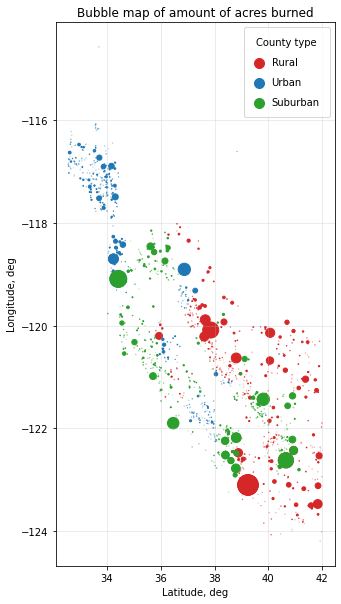

In [162]:
x = final_data.Latitude
y = final_data.Longitude
size = final_data.AcresBurned/1000

color_map = {'Rural': 'tab:red', 'Urban': 'tab:blue', 'Suburban': 'tab:green'}
colors = final_data.Caucus.map(color_map)

plt.figure(figsize=(5,10))
for county in final_data.Caucus.unique():
    x = final_data[final_data['Caucus'] == county].Latitude
    y = final_data[final_data['Caucus'] == county].Longitude
    size = final_data[final_data['Caucus'] == county].AcresBurned/1000
        
    plt.scatter(x, 
                y, 
                s = size,
                c = color_map[county],
                label = county)

# plt.colorbar()
plt.ylabel("Longitude, deg")
plt.xlabel("Latitude, deg")
plt.title("Bubble map of amount of acres burned")

legend = plt.legend(title = "County type", 
           labelspacing = 1,
           handlelength=1,
           borderpad = 1,
           )

# change the marker size manually to amke the same
for handle in legend.legendHandles:
    handle.set_sizes([100.0])

# plt.legend(legend_elements)
plt.grid(alpha=0.3)

# for i, txt in enumerate(clean_data_3.Counties):
#     plt.annotate(txt, (clean_data_3.Latitude[i], clean_data_3.Longitude[i]))

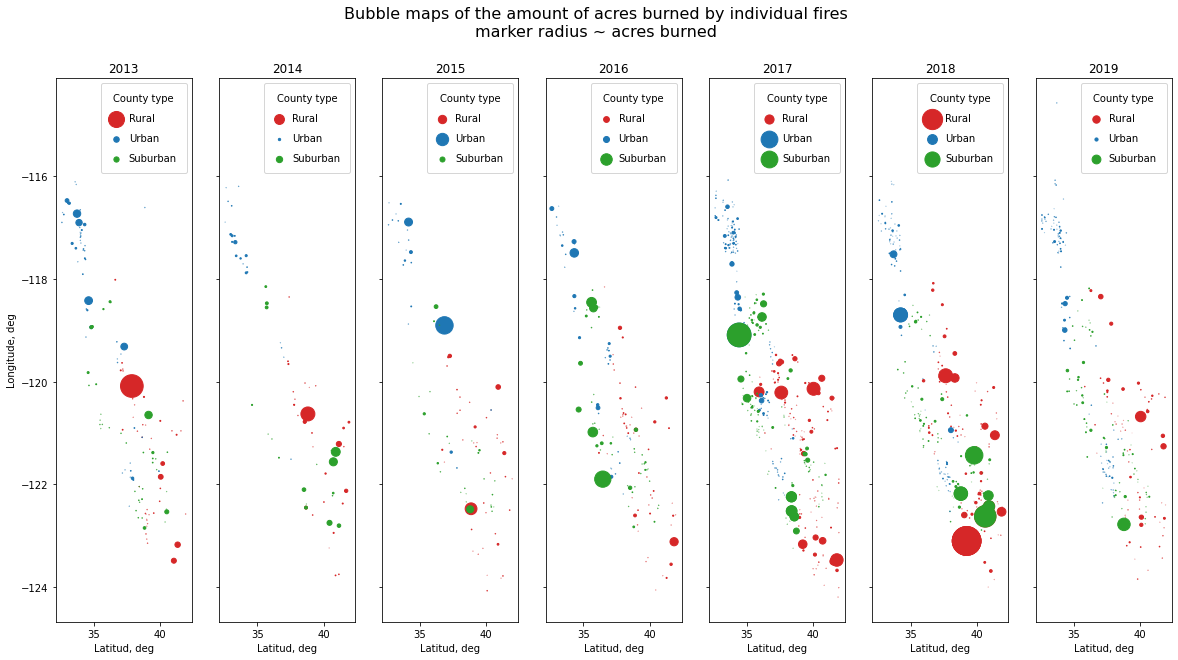

In [163]:
# Review yearly map
years = final_data.TimeStarted.apply(lambda row: row.strftime("%Y")).unique()

fig, ax = plt.subplots(1,7, sharex='col', sharey='row', figsize = (20,10))
fig.suptitle("Bubble maps of the amount of acres burned by individual fires\nmarker radius ~ acres burned", fontsize=16)
for i in range(len(years)-1):
    for county in final_data.Caucus.unique():
        data = final_data[
            (final_data['Caucus'] == county) & 
            (final_data['TimeStarted'].apply(lambda row: row.strftime("%Y")) == years[i])
            ]
        
        x = data.Latitude
        y = data.Longitude
        size = data.AcresBurned/500

        ax[i].scatter(x, 
                    y, 
                    s = size,
                    c = color_map[county],
                    label = county)
        ax[i].set_title(years[i])
        
        ax[i].legend(title = "County type", 
           labelspacing = 1,
           handlelength=1,
           borderpad = 1,
           )
        ax[i].set_xlabel("Latitud, deg")
        ax[0].set_ylabel("Longitude, deg")
fig.savefig("buble_chart_of_are_burnt_per_fire_through_years.png")

In [164]:
# See if some counties burn more often tahn others
final_data.County.nunique()

56

In [165]:
final_data_grouped_by_county = final_data.groupby(['Caucus', 'ArchiveYear'])

In [166]:
final_data_grouped_by_county.AcresBurned.sum()

Caucus    ArchiveYear
Rural     2013            311318.0
          2014            137892.0
          2015            124191.0
          2016             65901.0
          2017            509996.0
          2018           2380706.0
          2019            135266.0
Suburban  2013             56223.0
          2014            114375.0
          2015             39248.0
          2016            308442.0
          2017            761224.0
          2018            709834.0
          2019            106646.0
Urban     2013            133175.0
          2014             17621.0
          2015            193521.0
          2016             83060.0
          2017            381833.0
          2018            249464.0
          2019             39508.0
Name: AcresBurned, dtype: float64

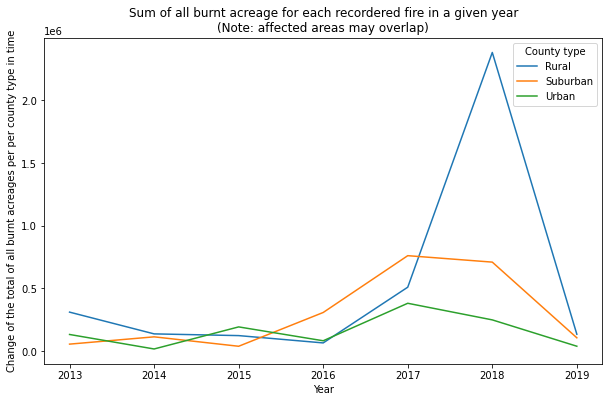

In [167]:
final_data_grouped_by_county.AcresBurned.sum().unstack(level=0).plot(figsize=(10,6))
plt.title(f"Sum of all burnt acreage for each recordered fire in a given year\n(Note: affected areas may overlap)")
plt.xlabel("Year")
plt.ylabel("Change of the total of all burnt acreages per per county type in time")
plt.legend(title = "County type")

In [168]:
# Here are three separate data tables for pushing to postgreSQL
fire_data = final_data

In [169]:
for name in fire_data.columns:
    print(name)

AcresBurned
AdminUnit
ArchiveYear
County
Extinguished
Fatalities
Latitude
FireLocation
Longitude
FireName
SearchDescription
Started
StructuresDamaged
StructuresDestroyed
StructuresEvacuated
StructuresThreatened
TimeStarted
TimeExtinguished
DayOfWeekStartedName
DayOfWeekStartedNum
Duration
Date_Established
Population_Jul_2019
AreaSqMi
AreaKm2
PopDensityPerSqMi
Caucus


In [170]:
data4qsl.describe(include='all')

<ipython-input-170-d13c880b3ed6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data4qsl.describe(include='all')
<ipython-input-170-d13c880b3ed6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data4qsl.describe(include='all')


,AcresBurned,AdminUnit,ArchiveYear,County,Extinguished,Fatalities,Latitude,FireLocation,Longitude,FireName,...,TimeExtinguished,DayOfWeekStartedName,DayOfWeekStartedNum,Duration,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2,PopDensityPerSqMi,Caucus
count,1459.000000,1462,1462.000000,1462,1403,21.000000,1462.000000,1462,1462.000000,1462,...,1403,1462,1462.000000,1403,1462.000000,1.462000e+03,1462.000000,1462.000000,1462.000000,1462
unique,NaN,454,NaN,56,889,NaN,NaN,1435,NaN,1087,...,889,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,CAL FIRE Sonoma-Lake-Napa Unit,NaN,Riverside,2018-01-09T13:46:00Z,NaN,NaN,"off Highway 20 near Potter Valley, northeast o...",NaN,Creek Fire,...,2019-01-04 09:33:00+00:00,Sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rural
freq,NaN,82,NaN,129,7,NaN,NaN,4,NaN,14,...,7,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,510
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1969-12-31 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-12-14 08:22:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4701.469500,NaN,2016.792750,NaN,NaN,8.619048,37.261031,NaN,-120.308065,NaN,...,NaN,NaN,2.960328,92 days 03:36:55.714771201,1858.746238,1.087757e+06,4019.395349,10410.172367,369.127827,NaN
std,28570.310646,NaN,1.805802,NaN,NaN,18.529642,2.548323,NaN,2.007609,NaN,...,NaN,NaN,2.026467,927 days 23:52:15.711221024,14.151833,1.811136e+06,3799.414668,9840.413120,625.534378,NaN
min,0.000000,NaN,2013.000000,NaN,NaN,1.000000,32.557546,NaN,-124.196290,NaN,...,NaN,NaN,0.000000,-17052 days +00:51:00,1850.000000,1.129000e+03,446.000000,1155.000000,1.527740,NaN
25%,35.000000,NaN,2016.000000,NaN,NaN,1.000000,35.006996,NaN,-121.870888,NaN,...,NaN,NaN,1.000000,2 days 03:18:00,1850.000000,7.866800e+04,1451.000000,3758.000000,47.564712,NaN


In [184]:
fire_data.shape

(1462, 27)

In [182]:
fire_data_nona = fire_data.dropna(subset=['AcresBurned', 'Longitude', 'Latitude', 'County', 'Extinguished'])
fire_data_nona.shape

(1403, 27)

In [185]:
fire_data.to_csv("fire_data.csv", header=True, index=False)